In [1]:
import pandas as pd 
import numpy as np 


In [2]:
Data_health=pd.read_csv("Maternal Health Risk Data Set.csv")

In [3]:
Data_health.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
#DATA CLEANING
Data_health.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
Data_health.describe

<bound method NDFrame.describe of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>

In [6]:
duplicated=Data_health[Data_health.duplicated()]

In [7]:
#check the duplicated rows 
duplicated

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [8]:
# get rid of duplicated rows 
Data_health.drop_duplicates(inplace =True)


In [9]:
Data_health.duplicated().sum()

0

In [10]:
#check for missing values
Data_health.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

# data exploration


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# what is the number of  women who are at high risk,mid risk and low risk

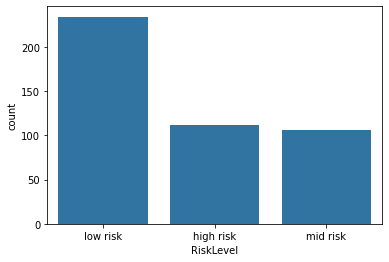

In [12]:
color=sns.color_palette()[0]
order=Data_health["RiskLevel"].value_counts().index
countplot=sns.countplot(data=Data_health,x="RiskLevel",order=order,color=color)



most of the women are at a low risk of maternal mortality

# test hypothesis most women above the age of 40 are at a high risk level

null hypothesis: all women above the age of 40 are high risk level

alternative hypothesis: not all women above the age of 40 are a high risk level

In [13]:
#use chi square of good fit
from scipy.stats import chi2_contingency
# Create a contingency table (cross-tabulation) of age and risklevel
contingency_table = pd.crosstab(Data_health["Age"], Data_health['RiskLevel'])
# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
# Output the test statistic, p-value, and degrees of freedom
print("Chi-squared test statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)

# Compare p-value with the significance level (e.g., 0.05) to make a decision about the hypotheses
if p_val < 0.05:
    print("Reject the null hypothesis: Not all women above the age of 40 are at high risk level.")
else:
    print("Fail to reject the null hypothesis: All women above the age of 40 are assumed to be at high risk level.")

Chi-squared test statistic: 182.13728244385157
P-value: 5.250600036368517e-07
Degrees of Freedom: 98
Reject the null hypothesis: Not all women above the age of 40 are at high risk level.


# what are the causes of the high risk level of the maternal health risk

In [14]:
Data_health["RiskLevel"].value_counts()

low risk     234
high risk    112
mid risk     106
Name: RiskLevel, dtype: int64

In [15]:
# use ordinal logistics regression
!pip install mord
from mord import LogisticIT
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Encode the ordinal target variable
target_map = {'high risk': 2, 'mid risk': 1, 'low risk': 0}
Data_health['risklevel_encoded'] = Data_health['RiskLevel'].map(target_map)
# Define the independent variables
X = Data_health[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']]
# Define the dependent variable
y = Data_health['risklevel_encoded']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the ordinal logistic regression model
model = LogisticIT()
model.fit(X_train, y_train)

# Predict using the test set
predictions = model.predict(X_test)

# Calculate accuracy (or other relevant metrics) for the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print(predictions)

Accuracy: 0.6263736263736264
[2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 2 0 0 2 0 2 0 0 0
 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0
 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0]


In [17]:
#RELATIONSHIP BETWEEN THE INDEPENDENT VARIABLES 
Data_health.corr()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,risklevel_encoded
Age,1.000000,0.375931,0.347846,0.376616,-0.188843,0.077407,0.183010
SystolicBP,0.375931,1.000000,0.790002,0.347534,-0.207267,-0.006088,0.327365
DiastolicBP,0.347846,0.790002,1.000000,0.300423,-0.201992,-0.016470,0.254239
BS,0.376616,0.347534,0.300423,1.000000,-0.042511,0.135605,0.548888
BodyTemp,-0.188843,-0.207267,-0.201992,-0.042511,1.000000,0.087262,0.259701
HeartRate,0.077407,-0.006088,-0.016470,0.135605,0.087262,1.000000,0.183289
risklevel_encoded,0.183010,0.327365,0.254239,0.548888,0.259701,0.183289,1.000000


# data distribution 

Text(0.5, 1.0, 'Distribution by HeartRate ')

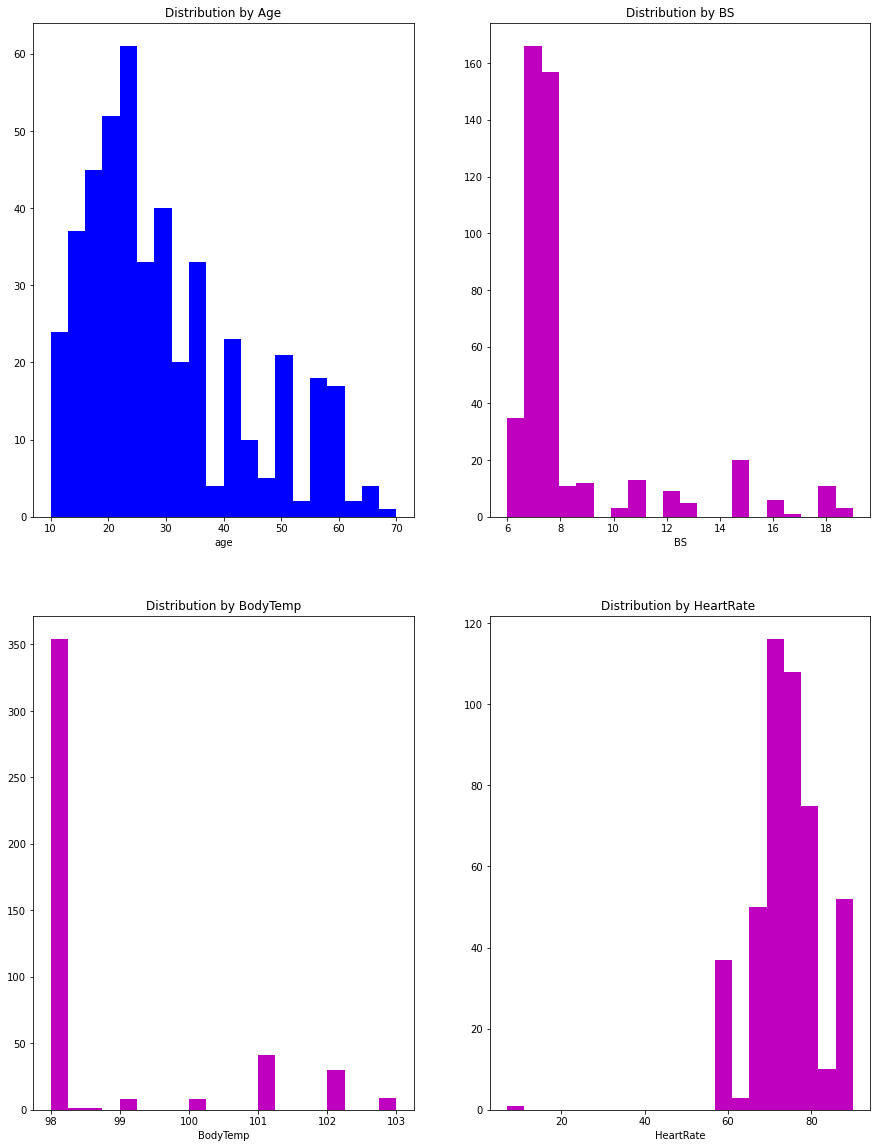

In [20]:
plt.figure(figsize=[15,20])
 
plt.subplot(2,2,1)
plt.hist(Data_health['Age'],bins=20,color='b')
plt.xlabel('age')
plt.title('Distribution by Age')
 
plt.subplot(2,2,2)
plt.hist(Data_health['BS'],bins=20,color='m')
plt.xlabel('BS')
plt.title('Distribution by BS')

plt.subplot(2,2,3)
plt.hist(Data_health['BodyTemp'],bins=20,color='m')
plt.xlabel('BodyTemp')
plt.title('Distribution by BodyTemp')

plt.subplot(2,2,4)
plt.hist(Data_health['HeartRate'],bins=20,color='m')
plt.xlabel('HeartRate')
plt.title('Distribution by HeartRate ')

In [22]:
!pip install --upgrade --no-deps statsmodels 
from statsmodels.miscmodels.ordinal_model import OrderedModel
model_prob =OrderedModel(Data_health['risklevel_encoded'],Data_health[['Age', 'SystolicBP','BS','BodyTemp','HeartRate']],distr='logit')
result_prob = model_prob.fit(method='bfgs')
result_prob.summary()

Requirement already up-to-date: statsmodels in c:\users\sa\anaconda3\lib\site-packages (0.14.0)


Optimization terminated successfully.
         Current function value: 0.771288
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:      risklevel_encoded   Log-Likelihood:                -348.62
Model:                   OrderedModel   AIC:                             711.2
Method:            Maximum Likelihood   BIC:                             740.0
Date:                Sun, 22 Oct 2023                                         
Time:                        19:47:24                                         
No. Observations:                 452                                         
Df Residuals:                     445                                         
Df Model:                           5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0111      0.009     -1.243      0.214      -0.028       0.006
SystolicBP     0.0404      0.007      5.608      0.000       0.026       0.055
BS             0.4757      0.059      8.038      0.000       0.360       0.592
BodyTemp       0.5262      0.077      6.814      0.000       0.375       0.678
HeartRate      0.0335      0.014      2.428      0.015       0.006       0.060
0/1           62.3600      7.924      7.870      0.000      46.830      77.890
1/2            0.5063      0.091      5.565      0.000       0.328       0.685
==============================================================================
"""